

---

<h1>Prévision de la production nationale moyenne de l'énergie solaire </h1>


---


<h2>Introduction </h2>

---

Nous disposons : (1) des données sur la production d’énergie solaire au pas de demi-heure, depuis le mois de janvier 2013 et ; (2) des données sur le rayonnement solaire global au pas de 3 heures (0h, 3h, 6h, 9h, 12h, 15h, 18h 21h), depuis le mois de janvier 2016. Ces données sont issues du site Open Data Réseaux Énergies (ODRÉ). 

Les données sur le rayonnement solaire global sont des estimations à partir des points de grille du modèle de prévision déterministe du Centre Européen de Prévisions Météorologiques à Moyen Terme (CEPMMT). Comme indiqué sur le site ODRÉ, les moyennes de rayonnement solaire global ne sont pas pondérées en fonction de l'emplacement des parcs (éoliens ou solaires). Cela explique au moins en partie, les différences observées dans le temps, entre les productions associées à un même niveau de rayonnement solaire.

Nous allons organiser les valeurs des productions en 3 classes délimitées par les quantiles 33% et 66%, ce sont dont des classes de même effectif. Nous allons prévoir la classe de la production moyenne nationale pour un instant t donné. Les variables explicatives pour prédire la production à l'instant t sont (a) les valeurs des productions moyennes aux huit instants qui précèdent l'instant t, (b) les valeurs des rayonnements moyensaux huit instants qui précèdent l'instant t et, (c) la valeur moyenne du rayonnement à l'instant t.  

Après des prétraitements sur ces données, nous effectuons un clustering non supervisé, une classification supervisée (K plus Proches Voisins - Forêt Aléatoire pour la Classification - Multi Layer Perceptron Classifier) et une modélisation par régression (Régression LASSO - Random Forest Regression - Multi Layer Perceptron Regression).

**Remarque : les principales fonctions contenant du code se trouvent en annexe (fin de page).**





---


<h2>Importation et prétraitement des données </h2>

---
Dans cette première partie, nous effectuons les opérations suivantes :

*   Importation des données à travers deux fichiers au format csv qui sont placés sur Google Drive dans le répertoire : content/drive/MyDrive/Colab Notebooks.
*   Importation des données à travers deux fichiers au format csv qui sont placés sur Google Drive dans le répertoire : content/drive/MyDrive/Colab Notebooks.
*   Effectuer quelques opérations pour mieux appréhender les données (afficher les informations sur les jeux de données).
*   En fonction de nos besoins, nous allons supprimer certaines colonnes et en créer d'autres. Pour les données de production nous n'allons retenir que les colonnes : 'Région','Date','Date - Heure' et 'Solaire (MW)'. Pour les données de rayonnement nous n'allons retenir que les colonnes : 'Région','Date - Heure' et 'Rayonnement (W/m2)'.
*   Enfin, nous allons fusionner des données dans un dataframe.


In [54]:
importation = importation_data()
df_production = importation[0]
df_rayonne = importation[1]
geo = importation[2]
pretraitement = pretraitement(df_production, df_rayonne)
df_production = pretraitement[0]
df_rayonne = pretraitement[1]
regions = get_regions(df_production)



---


<h2>Analyses préliminaires et interprétations</h2>


---



Dans cette section, nous effectuons quelques analyses préliminaires, notamment l'analyse de :

*   L'évolution moyenne annuelle de la production nationale de l'énergie solaire de 2013 à 2020. Il en ressort que chaque année, on note une nette augmentation de la consommation nationale de l'énergie solaire.
*   L'évolution moyenne annuelle par régions de la production nationale de l'énergie solaire de 2013 à 2020.
*   La répartition de la production moyenne de l'énergie solaire par région.
*   L'évolution de la production moyenne de l'énergie solaire par région et en fonction des heures de la journée.
*   L'évolution de la production moyenne de l'énergie solaire en fonction des jours de la semaine.
*   L'étude de la corrélation entre les productions moyennes annuelles des régions.
*   Le nuage de points rayonnement (W/m2)/production énergie Solaire (MW).
*   l'évolution de la production nationale moyenne dans le temps. 


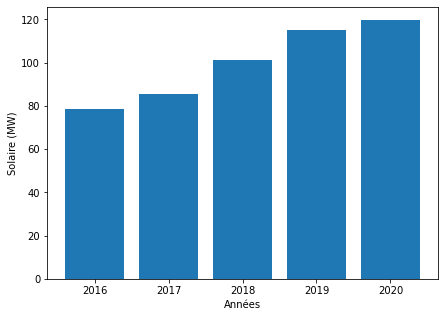

In [55]:
#Evolution moyenne annuelle de la production nationale de l'énergie solaire de 2013 à 2020.
evol_an_glob_prod_solaire(df_production)

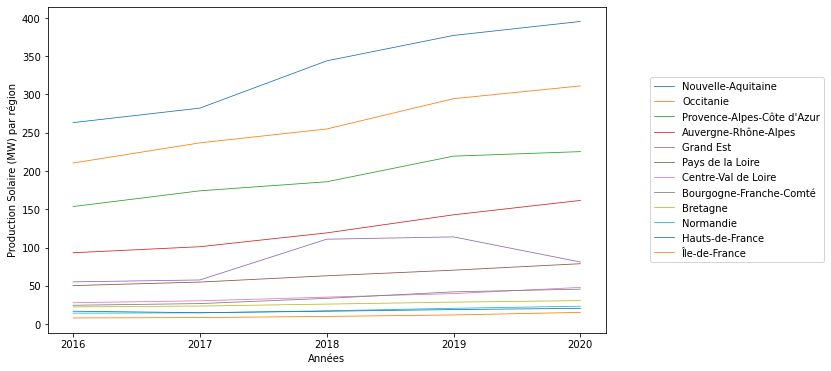

In [56]:
#Evolution moyenne annuelle par régions de la production nationale de l'énergie solaire de 2013 à 2020.
evol_moy_an_reg_prod_solaire(df_production, regions)

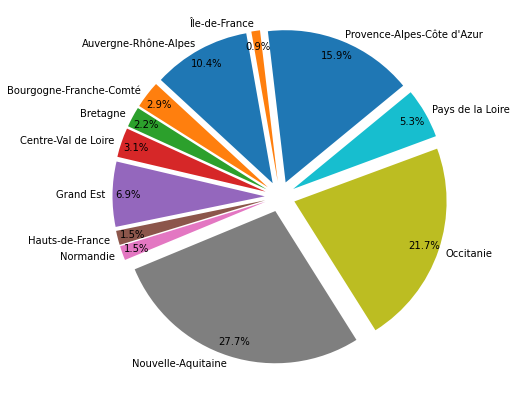

In [57]:
#Répartition de la production moyenne de l'énergie solaire par région.
repartion_prod_sola(df_production)

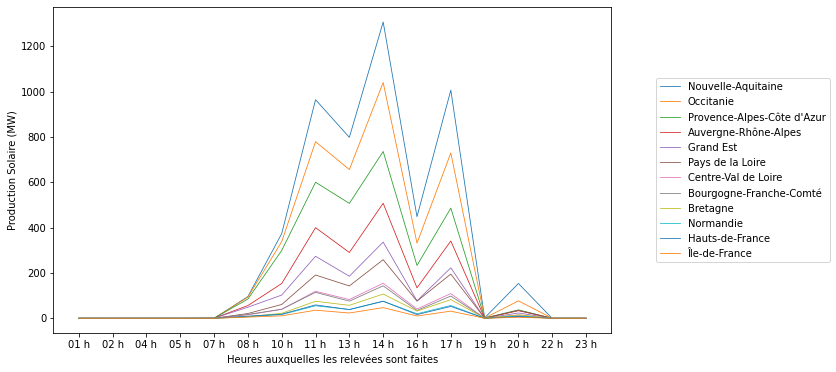

In [58]:
#Evolution de la production moyenne de l'énergie solaire par région et en fonction des heures de la journée.
evol_prod_journee(df_production, regions)

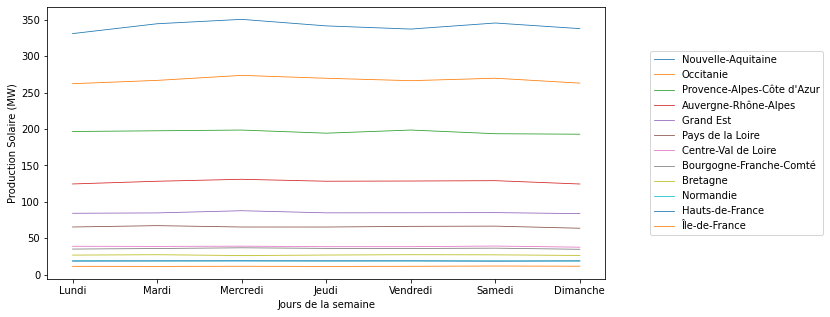

In [59]:
#Evolution de la production moyenne de l'énergie solaire en fonction des jours de la semaine.
evol_prod_sol_sem(df_production, regions) 

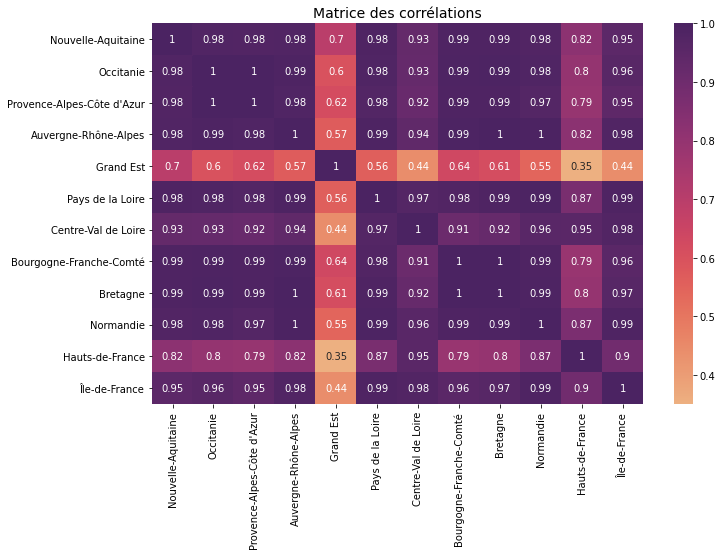

In [60]:
#Etude de la corrélation entre les productions moyennes annuelles des régions.
correlation(df_production, regions)

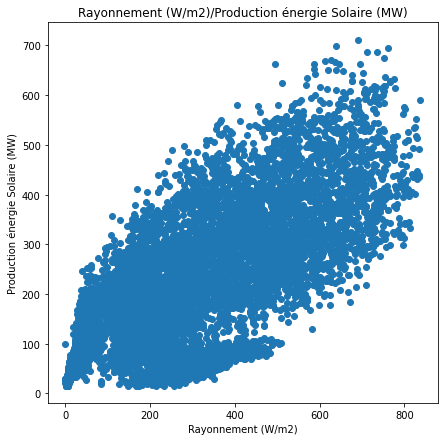

In [61]:
#Nuage de points rayonnement (W/m2)/production énergie Solaire (MW).
nuage_point(df_production)

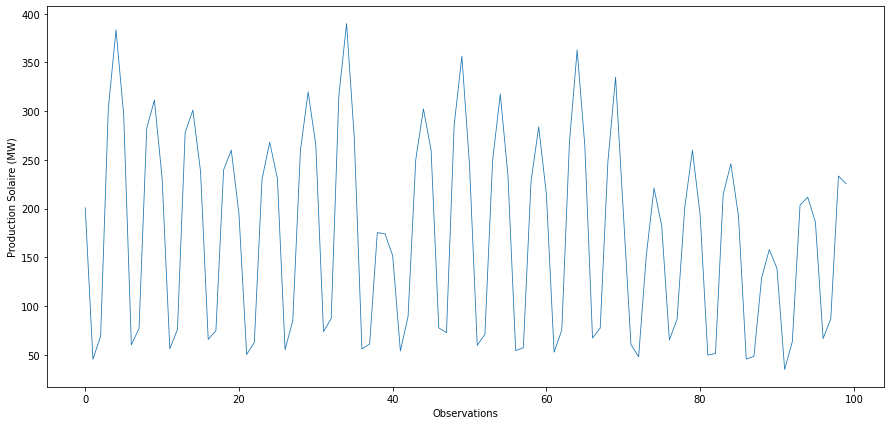

In [62]:
#Evolution de la production nationale moyenne dans le temps. 
variation_prod_sol(df_production, 500, 100)

<h2>Quelques commentaires</h2>

Nous pouvons formuler les observations suivantes :

*   La production globale d'énergie solaire en France, croit d'une année à l'autre. La production moyenne a été multipliée par 3 entre 2013 et 2020. Cette croissance est plus importante pour certaines régions telles que Nouvelle-Aquitaine, l'Occitanie, Provence-Alpes-Côte d'Azur et Auvergne-Rhône-Alpes. Le niveau de production est très faible et reste stagnant depuis 2013 pour les régions telles que : Île-de-France, Normandie, Hauts-de-France, Bretagne, Bourgogne-Franche-Comté, Centre-Val de Loire et Pays de la Loire. Après une période de croissance, on note depuis 2019 une décroissance de la production de la région de Grand Est.

*   La production de l'énergie solaire est concentrée sur le créneau horaire 7h-19h : c'est la période de la journée où on dispose du rayonnement solaire nécessaire à la production.

*   Les variations relatives observées dans la production ne dépendent ni de la région ni du jour de la semaine. En d'autres termes, il y'a une corrélation entre les productions. Cela se vérifie à travers la table de corrélation proposée.

*   Le nuage des points montre qu'il peut avoir corrélation linéaire entre la production et le niveau de rayonnement.





---


<h2>Modélisation avec Scikit-Learn</h2>


---


Dans cette section, nous proposons quelques modèles basés sur Scikit-Learn. Nous allons dans un premier temps, préparer les jeux de données d'entrainement et de test. Nous allons séparer la cible (Y : production solaire) des données explicatives (data). Nous allons également créer une variable cible de catégories Y_cut en créant trois tranches de production d'énergie solaire. Ces tranches sont construites d'après les quantiles 33% et 66%.


In [63]:
data = data_model(df_production)

- Quantiles à 33% et 66% :
0.33    117.205111
0.66    277.833333
Name: Solaire (MW), dtype: float64

- Proportion des observations consécutives qui changent de classe :  53.0253984063745
- Taille du jeu d'entraîntement : 5622
- Taille du jeu de test : 2410
- Moyenne sur le jeu d'entraînement : 220
- Moyenne sur le jeu de test : 224

Répartition de la production



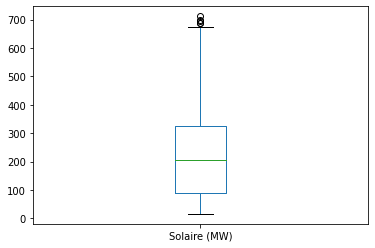

In [64]:
initialisation  = init_non_sup(data)
data = initialisation[0]
ix_train = initialisation[1]
ix_test = initialisation[2]
Y = initialisation[3]
Y_cut = initialisation[4]



---


<h2>Clustering non supervisé</h2>


---


Nous allons utilisé l'algorithme des k-means pour regrouper les productions en 3 classes. Nous allons comparer les classes issues de l'algorithme au regroupement par tranche de productions que nous avons envisagé.


On affiche les boxplot des productions par clusters :


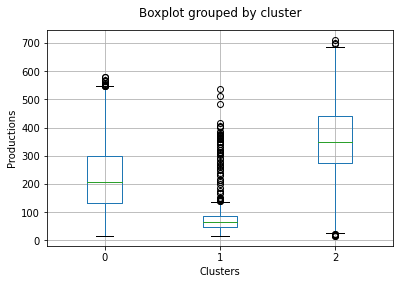

In [65]:
clustering_non_sup = clustering_non_sup(data,ix_train, Y, Y_cut)
train_clusters = clustering_non_sup[0]
Kmeans_model = clustering_non_sup[1]

In [66]:
cross_table(train_clusters)

On affiche la table des profils ligne par tranche de production d'énergie, pour chaque cluster :


production_cut,"(15.999, 117.205]","(117.205, 277.833]","(277.833, 711.833]"
cluster,,,
0,0.195562,0.509709,0.294730
1,0.943796,0.029927,0.026277
2,0.024123,0.239766,0.736111


In [236]:
score_non_sup(data, ix_test, Kmeans_model)

Si chaque ligne (jeu de test) est affectée à la classe dominante du cluster :
- Accuracy : 0.6631
- Recall : 0.7272
- Score F1  : 0.6731


<h2> Quelques commentaires </h2>
On constate que les trois clusters proposés par l'algorithme correspondent plus ou moins à nos classes de productions : le cluster 0 correspond à la classe inférieure, le cluster 1 correspond à la classe supérieure et le cluster 2 correspond à la classe intermédiaire. Si nous classons chaque cluster selon la classe dominante, nous abstenons un score d'environ 70%, ce qui est tout à fait satisfaisant. 



---


<h2>Classification supervisée</h2>


---


Dans cette section, nous allons effectuer trois types de Classification supervisée : K plus Proches Voisins - Forêt Aléatoire pour la Classification - Multi Layer Perceptron Classifier. La variable cible c'est la classe de production de l'énergie solaire et les variables explicatives sont les productions des 7 derniers jours avant et les prévisions du rayonnement solaire. 

In [67]:
#Classification supervisée, pour retrouver une tranche de production d'énergie solaire :
# Initialisation des modèles :

KNN_model = KNeighborsClassifier(n_neighbors=11)
RFC_model = RandomForestClassifier(n_estimators=100, max_depth=8, min_samples_leaf=7, random_state=0)
MLPC_model = MLPClassifier(hidden_layer_sizes=(50,), activation='relu', max_iter=1000, random_state=0)

# Après application des modèles, on affiche les différents indicateurs de précision 
clas_sup(data, ix_train, ix_test, Y_cut)

CPU times: user 27.4 ms, sys: 1.01 ms, total: 28.4 ms
Wall time: 35.9 ms
CPU times: user 1.36 s, sys: 1.27 ms, total: 1.36 s
Wall time: 1.37 s
CPU times: user 7.93 s, sys: 19.5 ms, total: 7.95 s
Wall time: 7.97 s

Plus proches voisins :
- Accuracy : 0.8315
- Recall : 0.8351
- Score F1  : 0.8333

Random Forest Classifier :
- Accuracy : 0.8519
- Recall : 0.8602 
- Score F1  : 0.8543

Multi Layer Perceptron Classifier :
- Accuracy : 0.8768
- Recall : 0.8771
- Score F1  : 0.8772


In [68]:
"""
Afin de s'assurer que les performances de nos modèles ne sont pas "dues à la chance", 
nous allons effectué une cross-validation.
"""
# Cross validation avec 5 folds : 
cross_val(data,Y_cut)

Accuracy KNN  : 0.82 (+/- 0.04)
Accuracy RFC  : 0.84 (+/- 0.04)
Accuracy MLPC : 0.86 (+/- 0.03)


In [69]:
#On affiche les différentes matrices de confusion
confus_mat(data, ix_train, ix_test, Y_cut )

On affiche la matrice de confusion sur (le jeu de test) knn :



Solaire (MW),"(15.999, 117.205]","(117.205, 277.833]","(277.833, 711.833]"
Predictions,,,
"(15.999, 117.205]",661,71,9
"(117.205, 277.833]",99,638,123
"(277.833, 711.833]",1,103,705




On affiche la matrice de confusion sur (le jeu de test) rfc :



Solaire (MW),"(15.999, 117.205]","(117.205, 277.833]","(277.833, 711.833]"
Predictions,,,
"(15.999, 117.205]",650,39,7
"(117.205, 277.833]",109,690,117
"(277.833, 711.833]",2,83,713




On affiche la matrice de confusion sur (le jeu de test) mlpc :



Solaire (MW),"(15.999, 117.205]","(117.205, 277.833]","(277.833, 711.833]"
Predictions,,,
"(15.999, 117.205]",698,67,3
"(117.205, 277.833]",58,666,85
"(277.833, 711.833]",5,79,749


<h1> Modélisation par régression</h1>

In [70]:
# Initialisation des modèles :
LASSO_model = Lasso(alpha=.1, random_state=0)
RFR_model = RandomForestRegressor(n_estimators=500, max_depth=20, min_samples_leaf=7, random_state=0)
MLPR_model = MLPRegressor(hidden_layer_sizes=(500,), activation='relu', max_iter=2000, random_state=0)

regression(data, Y, ix_train, ix_test)

CPU times: user 36.9 ms, sys: 28.2 ms, total: 65.1 ms
Wall time: 60.2 ms
CPU times: user 26.1 s, sys: 122 ms, total: 26.2 s
Wall time: 26.1 s
CPU times: user 1min 35s, sys: 1min, total: 2min 36s
Wall time: 1min 19s

LASSO :
- R2   : 0.8203
- RMSE : 55.8127

Random Forest Regression :
- R2   : 0.9014
- RMSE : 41.9146

Multi Layer Perceptron Regression :
- R2   : 0.9315
- RMSE : 36.2606


In [71]:
cross_val_regress(data, Y)


R2 LASSO   : 0.81 (+/- 0.08)
RMSE LASSO : 60.02 (+/- 14.11)

R2 RFR     : 0.88 (+/- 0.04)
RMSE RFR   : 47.12 (+/- 12.14)

R2 MLPR    : 0.92 (+/- 0.04)
RMSE MLPR  : 38.19 (+/- 6.41)




---
<h2> Interprétabilité des modèles </h2>

---




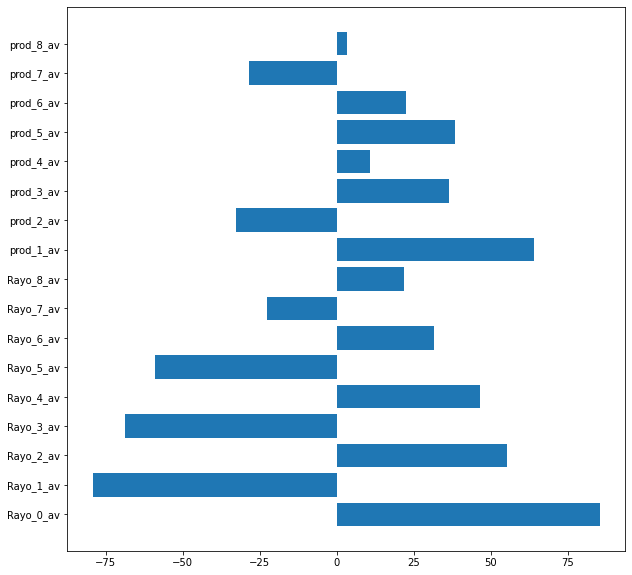

In [93]:
# Interprétabilité modèle LASSO
interpret_LASSO(LASSO_model)

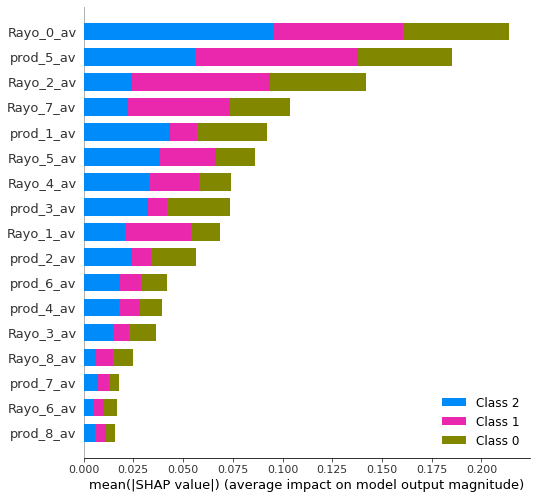

In [92]:
# Interprétabilité modèle RFC
interpre_RFC (RFC_model)

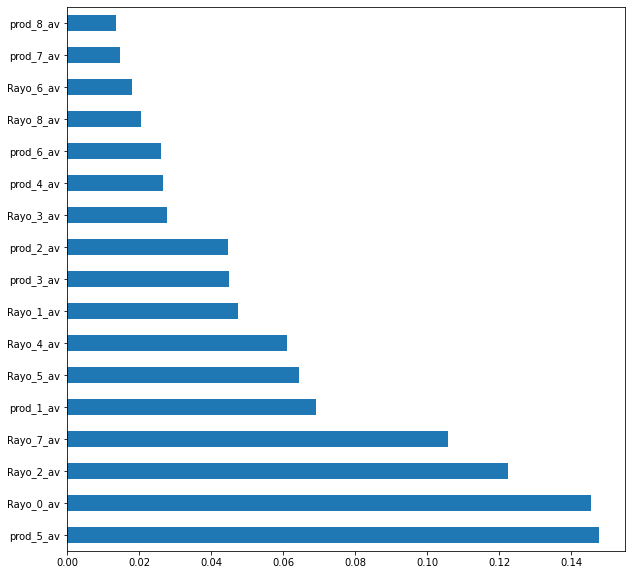

In [91]:
# Autre approche d'interprétabilité modèle RFC
feat_importances = pd.Series(RFC_model.feature_importances_, index=data.columns)
feat_importances.nlargest(20).plot(kind = 'barh');

## Annexe : Principales fonctions

In [ ]:
pip install shap

In [86]:
#Importation des packages
from IPython.utils import io
with io.capture_output() as captured:
  import folium
  import json
  import numpy as np
  import pandas as pd
  import matplotlib.pyplot as plt
  import seaborn as sns
  from scipy.stats import pearsonr
  from statsmodels.tsa.seasonal import seasonal_decompose
  from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
  import statsmodels.api as sm
  import scipy.stats
  import datetime
  from sklearn.model_selection import KFold
  from sklearn import preprocessing
  from sklearn.cluster import KMeans
  from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score
  from sklearn.neighbors import KNeighborsClassifier
  from sklearn.ensemble import RandomForestClassifier
  from sklearn.neural_network import MLPClassifier
  from sklearn.model_selection import cross_val_score
  from sklearn.linear_model import Lasso
  from sklearn.ensemble import RandomForestRegressor
  from sklearn.neural_network import MLPRegressor
  from sklearn.model_selection import cross_validate
  from sklearn.model_selection import train_test_split
  import statsmodels.api as sm
  %matplotlib inline

#Immportation des données
def importation_data(): 
  chemin_drive = '/content/drive/MyDrive/Colab_Notebooks/'
  with io.capture_output() as captured:
    df_production = pd.read_csv(chemin_drive+'eco2mix-regional-cons-def.csv', sep=';');
    df_rayonne = pd.read_csv(chemin_drive+'rayonnement-solaire-vitesse-vent-tri-horaires-regionaux.csv', sep=';');
    geo = json.load(open(chemin_drive+ 'georef-france-region.geojson'));
  return [df_production, df_rayonne, geo]

#Pré-traitement 
def pretraitement(df_production, df_rayonne):
  columns = ['Région','Date','Date - Heure', 'Solaire (MW)']
  df_production = df_production.drop(df_production.columns.difference(columns),axis=1)
  df_production = df_production.dropna()

  df_rayonne = df_rayonne.drop(['Code INSEE région', 'Vitesse du vent à 100m (m/s)'],axis=1)
  df_rayonne.rename(columns={'Date': 'Date - Heure'}, inplace=True)
  df_rayonne.rename(columns={'Rayonnement solaire global (W/m2)': 'Rayonnement (W/m2)'}, inplace=True)

  df_production = pd.merge(df_production, df_rayonne)
  df_production['Heure']=df_production['Date - Heure'].apply(lambda x : str(x)[11:13])
  df_production['Date'] = pd.to_datetime(df_production['Date'])
  df_production['Jour']=df_production['Date'].apply(lambda x : x.weekday())
  return [df_production, df_rayonne]

#L'évolution moyenne annuelle de la production nationale de l'énergie solaire de 2013 à 2020.
def evol_an_glob_prod_solaire(df_production):
  df_production['Année']=df_production['Date'].apply(lambda x : str(x)[:4])
  df_temp= df_production.groupby(['Année']).aggregate({'Solaire (MW)': 'mean'}).reset_index()
  fig = plt.figure(figsize=(7,5))
  plt.bar(df_temp['Année'][:-1], df_temp['Solaire (MW)'][:-1]) ; 
  plt.xlabel('Années')
  plt.ylabel('Solaire (MW)')
  plt.show() 

#L'évolution moyenne annuelle par régions de la production nationale de l'énergie solaire de 2013 à 2020.
def evol_moy_an_reg_prod_solaire(df_production, regions):
  df_temp= df_production.groupby(['Région','Année']).aggregate({'Solaire (MW)': 'mean' }).reset_index()
  x = df_temp['Année'].unique().tolist()
  x = [i+' h' for i in x]
  fig = plt.figure(figsize=(10,6))
  for r in range(len(regions)) : 
    plt.plot(df_temp['Année'].unique().tolist()[:-1], df_temp[df_temp['Région']==regions[r]]['Solaire (MW)'][0:-1], linewidth=0.8, label=regions[r])
  plt.xlabel('Années')
  plt.ylabel('Production Solaire (MW) par région')
  plt.legend(loc='center right', bbox_to_anchor=(1.4, 0.5));

def get_regions(df_production): 
  df_ztemp = df_production.groupby(['Région'])['Solaire (MW)'].sum().reset_index().sort_values(by=['Solaire (MW)'], ascending=False)
  regions = df_ztemp['Région'].unique().tolist()
  return regions

#La répartition de la production moyenne de l'énergie solaire par région. 
def repartion_prod_sola(df_production):
  df_temp= df_production.groupby(['Région','Année']).aggregate({'Solaire (MW)': 'mean' }).reset_index()
  plt.figure( figsize= (10, 7) )
  explode = [0.1 for i in range(12)] 
  df_temp = df_production.groupby(["Région"]).agg({'Solaire (MW)': 'mean'}).reset_index()
  x= df_temp['Solaire (MW)']
  labels = df_temp['Région'].unique().tolist()
  plt.pie(x, labels =labels, rotatelabels=False, explode=explode, autopct='%1.1f%%', 
        pctdistance=0.9, labeldistance=1.05, startangle=100, shadow=False );

#L'évolution de la production moyenne de l'énergie solaire par région et en fonction des heures de la journée. 
def evol_prod_journee(df_production, regions):
  df_temp= df_production.groupby(['Région','Heure']).aggregate({'Solaire (MW)': 'mean', 'Rayonnement (W/m2)': 'mean' }).reset_index()
  fig = plt.figure(figsize=(10,6))
  for r in range(len(regions)) : 
    x = df_temp[df_temp['Région']==regions[r]]['Heure'].unique().tolist()
    x = [i+' h' for i in x]
    plt.plot(x, df_temp[df_temp['Région']==regions[r]]['Solaire (MW)'], linewidth=0.8, label=regions[r])
  plt.xlabel('Heures auxquelles les relevées sont faites')
  plt.ylabel('Production Solaire (MW)')
  plt.legend(loc='center right', bbox_to_anchor=(1.4, 0.5));

#L'évolution de la production moyenne de l'énergie solaire en fonction des jours de la semaine. 
def evol_prod_sol_sem(df_production, regions) : 
  df_temp= df_production.groupby(['Région','Jour']).aggregate({'Solaire (MW)': 'mean', 'Rayonnement (W/m2)': 'mean' }).reset_index()
  fig = plt.figure(figsize=(10,5))
  for r in range(len(regions)) : 
    x = df_temp[df_temp['Région']==regions[r]]['Jour'].unique().tolist()
    plt.plot(x, df_temp[df_temp['Région']==regions[r]]['Solaire (MW)'], linewidth=0.8, label=regions[r])
  plt.xlabel('Jours de la semaine')
  plt.xticks([0, 1, 2,3,4,5,6], ['Lundi', 'Mardi', 'Mercredi', 'Jeudi', 'Vendredi','Samedi','Dimanche'])
  plt.ylabel('Production Solaire (MW)')
  plt.legend(loc='center right', bbox_to_anchor=(1.4, 0.5));

#Etude de la corrélation entre les productions moyennes annuelles. 
def correlation(df_production, regions):
  import pandas as pd
  df_corr =pd.DataFrame({})
  for c in range(len(regions)):
    df_corr[regions[c]]= pd.Series((df_production[df_production['Région']
                           ==regions[c]]).groupby(['Année'],
                                                  as_index=False).agg({'Solaire (MW)': 'mean'})['Solaire (MW)'])
  fig = plt.figure(figsize=(11,7))
  ax = fig.add_subplot(111)
  sns.heatmap(df_corr.corr(), annot=True, cmap='flare', ax=ax)
  ax.set_title('Matrice des corrélations', fontsize=14)
  plt.show();

#Le nuage de points rayonnement (W/m2)/production énergie Solaire (MW). 
def nuage_point(df_production):
  df_temp=df_production[df_production['Solaire (MW)']>15] 
  df_temp = df_temp.drop(['Région'],axis=1)
  df_temp = df_temp.groupby(['Date - Heure']).aggregate({'Solaire (MW)': 'mean', 'Rayonnement (W/m2)': 'mean' }).reset_index()
  plt.figure( figsize= (7, 7) )
  plt.scatter(df_temp['Rayonnement (W/m2)'], df_temp['Solaire (MW)'])
  plt.title('Rayonnement (W/m2)/Production énergie Solaire (MW)')
  plt.xlabel('Rayonnement (W/m2)')
  plt.ylabel('Production énergie Solaire (MW)')
  plt.show()

#L'évolution de la production dans le temps. 
def variation_prod_sol(df_production, deb, nb):
  df_temp=df_production[df_production['Solaire (MW)']>15] 
  df_temp = df_temp.drop(['Région'],axis=1)
  df_temp= df_temp.groupby(['Date - Heure']).aggregate({'Solaire (MW)': 'mean', 'Rayonnement (W/m2)': 'mean' }).reset_index()
  fig = plt.figure(figsize=(15,7))
  #x = range(df_temp['Solaire (MW)'].shape[0])
  #deb = 890
  #nb = 100
  x = range(nb)
  plt.plot(x, df_temp['Solaire (MW)'][deb:deb+nb], linewidth=0.8)
  #plt.plot(x, df_temp['Rayonnement (W/m2)'][deb:deb+nb], linewidth=0.8, color='r', label=regions[r])
  plt.xlabel('Observations')
  plt.ylabel('Production Solaire (MW)');

"""
Construction du dataframe constitué de la production des 7 derniers jours avant et du rayonement du jour (météo). 
"""
def data_model(df_production):
  df_temp=df_production[df_production['Solaire (MW)']>15] 
  df_temp = df_temp.drop(['Région'],axis=1)
  df_temp= df_temp.groupby(['Date - Heure']).aggregate({'Solaire (MW)': 'mean', 'Rayonnement (W/m2)': 'mean' }).reset_index()
  n =8 #nb d'observation considérées 
  m = 0 #nb d'observations d'écart
  colonnes = []
  p=m+n
  for i in range (n):
    colonnes.append('prod_'+str(p-i)+'_av')
  for i in range (n):
    colonnes.append('Rayo_'+str(n-i)+'_av')
  colonnes.append('Rayo_0_av')
  colonnes.append('Solaire (MW)')
  data = pd.DataFrame(columns=colonnes)
  for i in range (p,df_temp.shape[0]) : 
    data.loc[(i-n)]= [k for k in pd.Series (df_temp.iloc[(i-p):(i-m) , 1:2]['Solaire (MW)'])] + [l for l in pd.Series (df_temp.iloc[(i-n):(i+1) , 2:3]['Rayonnement (W/m2)'])]+[df_temp['Solaire (MW)'][i]]
  return data

def init_non_sup(data):
  Y = data['Solaire (MW)']
  data =  data.loc[:,data.columns.difference(['Solaire (MW)'])]
  Y_cut = pd.cut(Y,Y.quantile([0,.33,.66,1]), include_lowest=True) 
  print("- Quantiles à 33% et 66% :")
  print(Y.quantile([.33,.66]))

  compt =0
  for i in range (1,Y_cut.shape[0]):
    if Y_cut[i] != Y_cut[i-1]:
      compt +=1
  print('\n- Proportion des observations consécutives qui changent de classe : ',compt*100/Y_cut.shape[0])

  Y.plot.box()

  ix_train = data.sample(frac=.7, replace=False, random_state=0).index.values 
  ix_test = data.index.difference(ix_train).values # Les autres iandexes forment le test set
  print("- Taille du jeu d'entraîntement : {}".format(len(ix_train)))
  print("- Taille du jeu de test : {}".format(len(ix_test)))

  """
  Le train set et le test set seront sélectionnés par leurs indexes.
  """
  print("- Moyenne sur le jeu d'entraînement :", round(Y.loc[ix_train].mean()))
  print("- Moyenne sur le jeu de test :", round(Y.loc[ix_test].mean()))

  print("\nRépartition de la production\n")

  ### Standardisation des données
  # Initialisation du standard scaler :
  std_scaler = preprocessing.StandardScaler()
  std_scaler.fit(data)
  data.loc[:,:] = std_scaler.transform(data)
  return [data, ix_train,ix_test, Y, Y_cut]

#Clustering non supervisé 
def clustering_non_sup(data,ix_train, Y, Y_cut):
  # Initialisation des paramètres de l'algorithme :
  Kmeans_model = KMeans(n_clusters=3, init = 'k-means++', random_state=123)

  # On applique le clustering sur le jeu d'entraînement (train) :
  # On enregistre dans la variable clusters le numéro du cluster auquel chaque enregistrement est identifié
  clusters = Kmeans_model.fit_predict(data.loc[ix_train])

  # On enregistre les clusters et les colonnes à comparer dans un dataframe pandas :
  train_clusters = pd.DataFrame([*zip(clusters, Y.loc[ix_train], Y_cut.loc[ix_train])],
                              columns=['cluster','production','production_cut'])
  print('On affiche les boxplot des productions par clusters :')
  fig = plt.figure()
  fig.suptitle('bold figure suptitle', fontsize=14, fontweight='bold')
  ax = fig.add_subplot(111)
  with io.capture_output() as captured:
    train_clusters.boxplot(by='cluster', ax=ax)
  ax.set_title('')
  ax.set_xlabel('Clusters')
  ax.set_ylabel('Productions')
  plt.show()
  return [train_clusters, Kmeans_model]

def cross_table(train_clusters):
  print("On affiche la table des profils ligne par tranche de production d'énergie, pour chaque cluster :")
  cross_table = pd.crosstab(train_clusters.cluster, train_clusters.production_cut, normalize='index')
  display(cross_table.style.background_gradient(cmap='Reds', axis=1, low=0, high=1))

def score_non_sup(data, ix_test, Kmeans_model):
  # Pour chaque ligne du jeu test, on retrouve le cluster auquel elle appartient. 
  clusters_test = Kmeans_model.predict(data.loc[ix_test])
  # On construit un dictionnaire pour associer à chaque cluster la classe dominante :
  dict_cluster_pred = {
    0:'(117.205, 277.833]',
    1:'(15.999, 117.205]',
    2:'(277.833, 711.833]' 
  }
  y_test_clusters = [dict_cluster_pred[c] for c in clusters_test]
  # Calcul de l'accuracy et du recall :
  print("Si chaque ligne (jeu de test) est affectée à la classe dominante du cluster :\n- Accuracy : {}\n- Recall : {}\n- Score F1  : {}".format(
    round(accuracy_score(y_test_clusters, Y_cut.astype(str)[ix_test]),4),
    round(recall_score(y_test_clusters,Y_cut.astype(str)[ix_test], average='macro'),4),
    round(f1_score(y_test_clusters,Y_cut.astype(str)[ix_test], average='macro'),4)
  ))

def clas_sup(data, ix_train, ix_test, Y_cut):
  # Pour la prédiction, le type Categorical (catégories ordonnées de pandas)
  # n'est pas compatible avec les fonctions de sklearn.metrics, on 
  # le convertit dans le type string :
  Y_cut_str = Y_cut.astype(str)
  # Entraînement :
  %time KNN_model.fit(data.loc[ix_train], Y_cut_str.loc[ix_train])
  %time RFC_model.fit(data.loc[ix_train], Y_cut_str.loc[ix_train])
  %time MLPC_model.fit(data.loc[ix_train], Y_cut_str.loc[ix_train])

  # Prédiction sur le jeu de test :
  y_test_knn = KNN_model.predict(data.loc[ix_test])
  y_test_rfc = RFC_model.predict(data.loc[ix_test])
  y_test_mlpc = MLPC_model.predict(data.loc[ix_test])

  # On affiche la précision (accuracy) et le rappel (recall) pour chaque méthode :
  from sklearn.metrics import accuracy_score, recall_score
  print("\nPlus proches voisins :\n- Accuracy : {}\n- Recall : {}\n- Score F1  : {}".format(
    round(accuracy_score(y_test_knn, Y_cut.astype(str)[ix_test]),4),
    round(recall_score(y_test_knn,Y_cut.astype(str)[ix_test], average='macro'),4),
    round(f1_score(y_test_knn,Y_cut.astype(str)[ix_test], average='macro'),4)
  ))
  print("\nRandom Forest Classifier :\n- Accuracy : {}\n- Recall : {} \n- Score F1  : {}".format(
    round(accuracy_score(y_test_rfc, Y_cut.astype(str)[ix_test]),4),
    round(recall_score(y_test_rfc,Y_cut.astype(str)[ix_test], average='macro'),4),
    round(f1_score(y_test_rfc,Y_cut.astype(str)[ix_test], average='macro'),4)
  ))
  print("\nMulti Layer Perceptron Classifier :\n- Accuracy : {}\n- Recall : {}\n- Score F1  : {}".format(
    round(accuracy_score(y_test_mlpc, Y_cut.astype(str)[ix_test]),4),
    round(recall_score(y_test_mlpc,Y_cut.astype(str)[ix_test], average='macro'),4),
    round(f1_score(y_test_mlpc,Y_cut.astype(str)[ix_test], average='macro'),4)
  ))

def cross_val(data,Y_cut ):
  """
  Afin de s'assurer que les performances de nos modèles ne sont pas "dues à la chance", 
  nous allons effectué une cross-validation.
  """
  # Cross validation avec 5 folds : 
  Y_cut_str = Y_cut.astype(str)
  scores_knn = cross_val_score(KNN_model, data, Y_cut_str, cv=5)
  scores_rfc = cross_val_score(RFC_model, data, Y_cut_str, cv=5)
  scores_mlpc = cross_val_score(MLPC_model, data, Y_cut_str, cv=5)

  # Afficher la moyenne et l'écart type des accuracy :
  print("Accuracy KNN  : %0.2f (+/- %0.2f)" % (scores_knn.mean(), scores_knn.std() * 2))
  print("Accuracy RFC  : %0.2f (+/- %0.2f)" % (scores_rfc.mean(), scores_rfc.std() * 2))
  print("Accuracy MLPC : %0.2f (+/- %0.2f)" % (scores_mlpc.mean(), scores_mlpc.std() * 2))


def confus_mat(data, ix_train, ix_test, Y_cut ):
  #On affiche les matrices de confusion
  # Entrainement et prédiction 
  Y_cut_str = Y_cut.astype(str)
  #KNN_model.fit(data.loc[ix_train], Y_cut_str.loc[ix_train])
  y_test_knn = pd.Series(KNN_model.predict(data.loc[ix_test]), name='Predictions') 
  # Transformation en série pour donner un nom à la colonne
  print("On affiche la matrice de confusion sur (le jeu de test) knn :\n")
  cross_table_knn = pd.crosstab(y_test_knn, Y_cut_str.loc[ix_test].reindex(ix_test).reset_index(drop=True))
  cross_table_knn = cross_table_knn.iloc[[1,0,2],[1,0,2]] # On réordonne les colonnes pour qu'elles soient dans le 'bon' ordre
  display(cross_table_knn.style.background_gradient(cmap='Reds', axis=1, low=0, high=1))
  print('\n')
  #RFC_model.fit(data.loc[ix_train], Y_cut_str.loc[ix_train])
  y_test_rfc = pd.Series(RFC_model.predict(data.loc[ix_test]), name='Predictions')
  print("On affiche la matrice de confusion sur (le jeu de test) rfc :\n")
  cross_table_rfc = pd.crosstab(y_test_rfc, Y_cut_str.loc[ix_test].reindex(ix_test).reset_index(drop=True))
  cross_table_rfc = cross_table_rfc.iloc[[1,0,2],[1,0,2]] # On réordonne les colonnes pour qu'elles soient dans le 'bon' ordre
  display(cross_table_rfc.style.background_gradient(cmap='Reds', axis=1, low=0, high=1))

  print('\n')
  #MLPC_model.fit(data.loc[ix_train], Y_cut_str.loc[ix_train])
  y_test_mlpc = pd.Series(MLPC_model.predict(data.loc[ix_test]), name='Predictions')
  print("On affiche la matrice de confusion sur (le jeu de test) mlpc :\n")
  cross_table_mlpc = pd.crosstab(y_test_mlpc, Y_cut_str.loc[ix_test].reindex(ix_test).reset_index(drop=True))
  cross_table_mlpc = cross_table_mlpc.iloc[[1,0,2],[1,0,2]] # On réordonne les colonnes pour qu'elles soient dans le 'bon' ordre
  display(cross_table_mlpc.style.background_gradient(cmap='Reds', axis=1, low=0, high=1))

def regression(data, Y, ix_train, ix_test): 
  # Entraînement :
  %time LASSO_model.fit(data.loc[ix_train], Y.loc[ix_train])
  %time RFR_model.fit(data.loc[ix_train], Y.loc[ix_train])
  %time MLPR_model.fit(data.loc[ix_train], Y.loc[ix_train])

  # Prédiction sur le jeu de test :
  y_test_lasso = LASSO_model.predict(data.loc[ix_test])
  y_test_rfr = RFR_model.predict(data.loc[ix_test])
  y_test_mlpr = MLPR_model.predict(data.loc[ix_test])

  # On affiche la précision (accuracy) et le rappel (recall) pour chaque méthode :
  from sklearn.metrics import r2_score, mean_squared_error
  print("\nLASSO :\n- R2   : {}\n- RMSE : {}".format(
    round(r2_score(y_test_lasso, Y[ix_test]),4),
    round(np.sqrt(mean_squared_error(y_test_lasso, Y[ix_test])),4)
  ))
  print("\nRandom Forest Regression :\n- R2   : {}\n- RMSE : {}".format(
    round(r2_score(y_test_rfr, Y[ix_test]),4),
    round(np.sqrt(mean_squared_error(y_test_rfr, Y[ix_test])),4)
  ))
  print("\nMulti Layer Perceptron Regression :\n- R2   : {}\n- RMSE : {}".format(
    round(r2_score(y_test_mlpr, Y[ix_test]),4),
    round(np.sqrt(mean_squared_error(y_test_mlpr, Y[ix_test])),4)
  ))

def cross_val_regress(data, Y): 
  # Cross validation avec 3 folds : 
  scores_lasso = cross_validate(LASSO_model, data, Y, cv=3, scoring=["r2","neg_mean_squared_error"])
  scores_rfr = cross_validate(RFR_model, data, Y, cv=3, scoring=["r2","neg_mean_squared_error"])
  scores_mlpr = cross_validate(MLPR_model, data, Y, cv=3, scoring=["r2","neg_mean_squared_error"])

  # Afficher la moyenne et l'écart type des accuracy :
  print("\nR2 LASSO   : %0.2f (+/- %0.2f)" % (scores_lasso["test_r2"].mean(), scores_lasso["test_r2"].std() * 2))
  print("RMSE LASSO : %0.2f (+/- %0.2f)" % (np.sqrt(scores_lasso["test_neg_mean_squared_error"]*-1).mean(), np.sqrt(scores_lasso["test_neg_mean_squared_error"]*-1).std() * 2))

  print("\nR2 RFR     : %0.2f (+/- %0.2f)" % (scores_rfr["test_r2"].mean(), scores_rfr["test_r2"].std() * 2))
  print("RMSE RFR   : %0.2f (+/- %0.2f)" % (np.sqrt(scores_rfr["test_neg_mean_squared_error"]*-1).mean(), np.sqrt(scores_rfr["test_neg_mean_squared_error"]*-1).std() * 2))

  print("\nR2 MLPR    : %0.2f (+/- %0.2f)" % (scores_mlpr["test_r2"].mean(), scores_mlpr["test_r2"].std() * 2))
  print("RMSE MLPR  : %0.2f (+/- %0.2f)" % (np.sqrt(scores_mlpr["test_neg_mean_squared_error"]*-1).mean(), np.sqrt(scores_mlpr["test_neg_mean_squared_error"]*-1).std() * 2))

def interpret_LASSO(LASSO_model):
  import matplotlib
  importance = LASSO_model.coef_
  matplotlib.pyplot.barh([x for x in range(len(importance))], importance)
  matplotlib.pyplot.yticks(np.arange(len(data.columns)), data.columns)
  matplotlib.pyplot.rcParams["figure.figsize"] = (10,10)
  matplotlib.pyplot.show()

def interpre_RFC (RFC_model): 
  import shap
  explainer = shap.TreeExplainer(RFC_model)
  shap_values = explainer.shap_values(data.loc[ix_test])
  shap.summary_plot(shap_values, data.loc[ix_test], plot_type="bar")
  